# Exercícios com dataset de vendas

Davy Rodrigues

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# plt.style.use('ggplot') 

In [2]:
df = pd.read_csv('Walmart_sales.csv', 
        sep=',')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
### convertendo o obj date para datetime

df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [5]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [6]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.096358,8.106


In [8]:
df.min()

Store                             1
Date            2010-01-10 00:00:00
Weekly_Sales              209986.25
Holiday_Flag                      0
Temperature                   -2.06
Fuel_Price                    2.472
CPI                         126.064
Unemployment                  3.879
dtype: object

In [9]:
df.max()

Store                            45
Date            2012-12-10 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      1
Temperature                  100.14
Fuel_Price                    4.468
CPI                      227.232807
Unemployment                 14.313
dtype: object

### Definindo bins

In [10]:
def numero_classes(x):
    n = x.shape[0]
    k = 1 + (10/3) * np.log10(n)
    k = int(round(k, 0))
    return k

In [11]:
numero_classes(df)

14

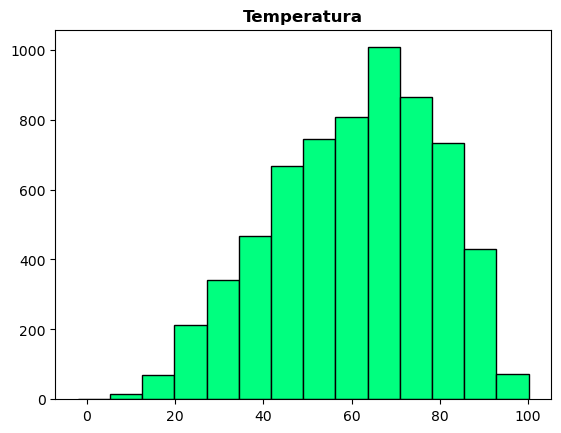

In [12]:
plt.hist(df['Temperature'], bins= 14, color='springgreen', edgecolor='k')
plt.title('Temperatura', fontdict={'weight': 'bold'},size=12)
plt.show()

In [13]:
dados_totais = df.groupby('Store').agg(
                temperatura_mediana =  pd.NamedAgg('Temperature', 'median'),
                CPI_media = pd.NamedAgg('CPI', 'mean'),
                media_taxa_desempregados = pd.NamedAgg('Unemployment', 'mean')
                                      )

dados_totais.head()

,temperatura_mediana,CPI_media,media_taxa_desempregados
Store,,,
1,69.64,215.996892,7.610420
2,69.21,215.646311,7.623846
3,73.01,219.391531,7.176986
4,64.22,128.679669,5.964692
5,70.96,216.565581,6.295406


In [14]:
### Top 5 lojas com maiores medias da taxa de desemprego 
top_5_desemprego = dados_totais.sort_values('media_taxa_desempregados', ascending=False).head()
top_5_desemprego = top_5_desemprego.reset_index('Store')

### Gráfico comparando as lojas com maior taxa de desemprego com sua CPI

In [15]:
stores = ['store ' + str(x) for x in top_5_desemprego['Store']]
y1 = top_5_desemprego['media_taxa_desempregados']
y2 = top_5_desemprego['CPI_media']
largura = 0.3

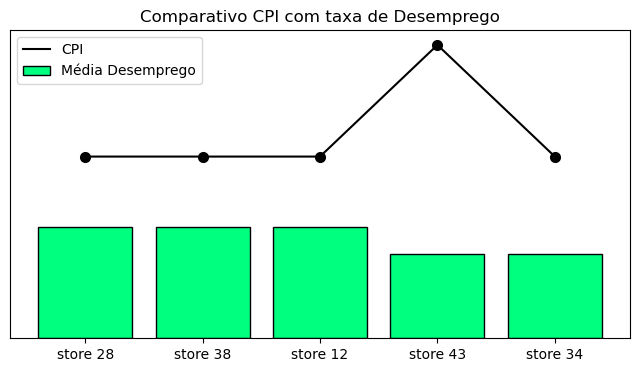

In [16]:
### tamanho do gráfico
plt.figure(figsize=(8,4))

### barras, linha e pontos
plt.bar(stores, y1 * 3, label = 'Média Desemprego', color = 'springgreen', edgecolor='k')
plt.scatter(stores, y2 /2, marker = "o", color='k', linewidth = 2)
plt.plot(stores, y2 / 2, label='CPI', linestyle='-', color='k')    

### titúlo
plt.title("Comparativo CPI com taxa de Desemprego")

### Removendo rótulos do eixo y
plt.yticks([])

plt.legend() 
plt.show()

In [17]:
### Primeiras 5 lojas com maiores medianas do CPI
top_5_cpi = dados_totais.sort_values('CPI_media', ascending=False).head()
top_5_cpi = top_5_cpi.reset_index('Store')
top_5_cpi

,Store,temperatura_mediana,CPI_media,media_taxa_desempregados
0,9,69.19,219.626689,6.099881
1,8,63.55,219.439026,6.091846
2,11,73.77,219.391531,7.176986
3,3,73.01,219.391531,7.176986
4,6,70.97,217.553197,6.606902


## Exercícios com datas 

In [18]:
### mostrando 2 casas decimais nos dataframes
pd.set_option('display.precision', 2)
### tirando notação cientifica
pd.set_option('float_format', '{:.2f}'.format)

In [19]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11


In [20]:
df['Store'] = df['Store'].astype(str)

In [21]:
df.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

### Agrupando por ano e  somando vendas semanais

#### Medianas

In [22]:
df.groupby(df['Date'].dt.year).mean('Fuel_Price')

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010,1059669.50,0.08,60.27,2.82,168.10,8.49
2011,1046239.32,0.08,58.80,3.56,171.55,8.08
2012,1033660.39,0.05,63.36,3.71,175.50,7.35


In [23]:
medianas_por_ano = df.groupby(df['Date'].dt.year).agg(
    vendas = pd.NamedAgg('Weekly_Sales', 'median'),
    preço_combustivel = pd.NamedAgg('Fuel_Price', 'median'),
    cpi = pd.NamedAgg('CPI', 'median'),
    taxa_desemprego = pd.NamedAgg('Unemployment', 'median')
)
medianas_por_ano = medianas_por_ano.reset_index('Date')
medianas_por_ano

,Date,vendas,preço_combustivel,cpi,taxa_desemprego
0,2010,974696.05,2.80,182.04,8.20
1,2011,948390.02,3.58,185.27,7.85
2,2012,960476.10,3.72,190.46,7.15


In [24]:
largura = 0.35
x = medianas_por_ano['Date']
y1 = medianas_por_ano['vendas']
y2 = medianas_por_ano['taxa_desemprego']
y3 = medianas_por_ano['cpi']

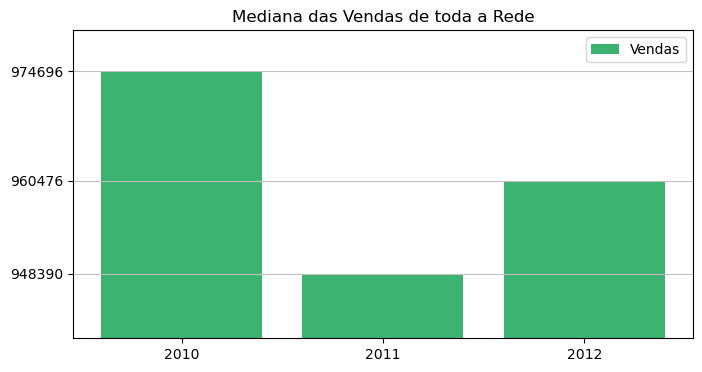

In [25]:
plt.figure(figsize=(8,4))
plt.title('Mediana das Vendas de toda a Rede')
plt.bar(x, y1, label = 'Vendas', color = 'mediumseagreen')
plt.ylim(940000, 980000)
plt.xticks(x)
plt.yticks(y1)
plt.grid(axis='y', color='silver')
plt.legend()
plt.show()

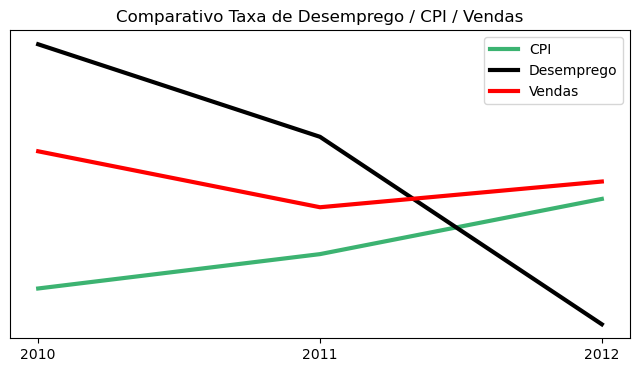

In [26]:
y = medianas_por_ano['vendas']
plt.figure(figsize=(8,4))
plt.title('Comparativo Taxa de Desemprego / CPI / Vendas')
plt.plot(x, y3 / 5, label = 'CPI', color = 'mediumseagreen', linewidth = 3)
plt.plot(x, y2 * 5, label = 'Desemprego', color = 'k', linewidth = 3)
plt.plot(x, y / 25000, label = 'Vendas', color = 'r', linewidth = 3)
plt.yticks([])
plt.xticks(x)
plt.legend()
plt.show()

## Dados por ano

In [27]:
def separar_por_ano(x):
    dados_2010 = x.loc[(df['Date'].dt.year == 2010)]
    dados_2011 = x.loc[(df['Date'].dt.year == 2011)]
    dados_2012 = x.loc[(df['Date'].dt.year == 2012)]
    
    return dados_2010, dados_2011, dados_2012

dados_2010, dados_2011, dados_2012 = separar_por_ano(df)

In [28]:
dados_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11


### Preço combustível

In [29]:
numero_classes(dados_2010)

12

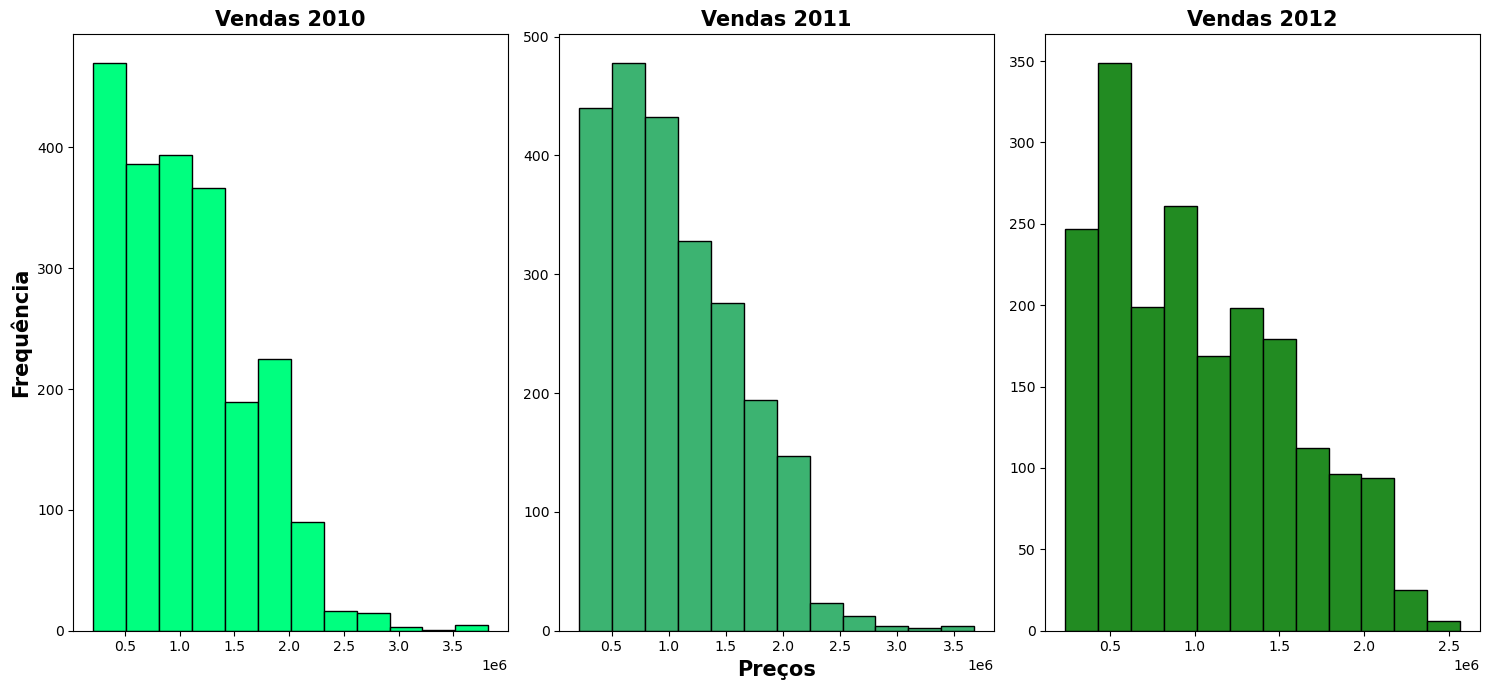

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
# Histograma 1
axs[0].hist(dados_2010['Weekly_Sales'], bins=12, color='springgreen', edgecolor='k')
axs[0].set_ylabel('Frequência', fontdict={'weight': 'bold'},size=15)
axs[0].set_title('Vendas 2010', fontdict={'weight': 'bold'},size=15)

# Histograma 2
axs[1].hist(dados_2011['Weekly_Sales'], bins=12, color='mediumseagreen', edgecolor='k')
axs[1].set_title('Vendas 2011', fontdict={'weight': 'bold'},size=15)
axs[1].set_xlabel('Preços', fontdict={'weight': 'bold'},size=15)

# Histograma 3
axs[2].hist(dados_2012['Weekly_Sales'], bins=12, color='forestgreen', edgecolor='k')
axs[2].set_title('Vendas 2012', fontdict={'weight': 'bold'},size=15)

plt.tight_layout()
plt.show()

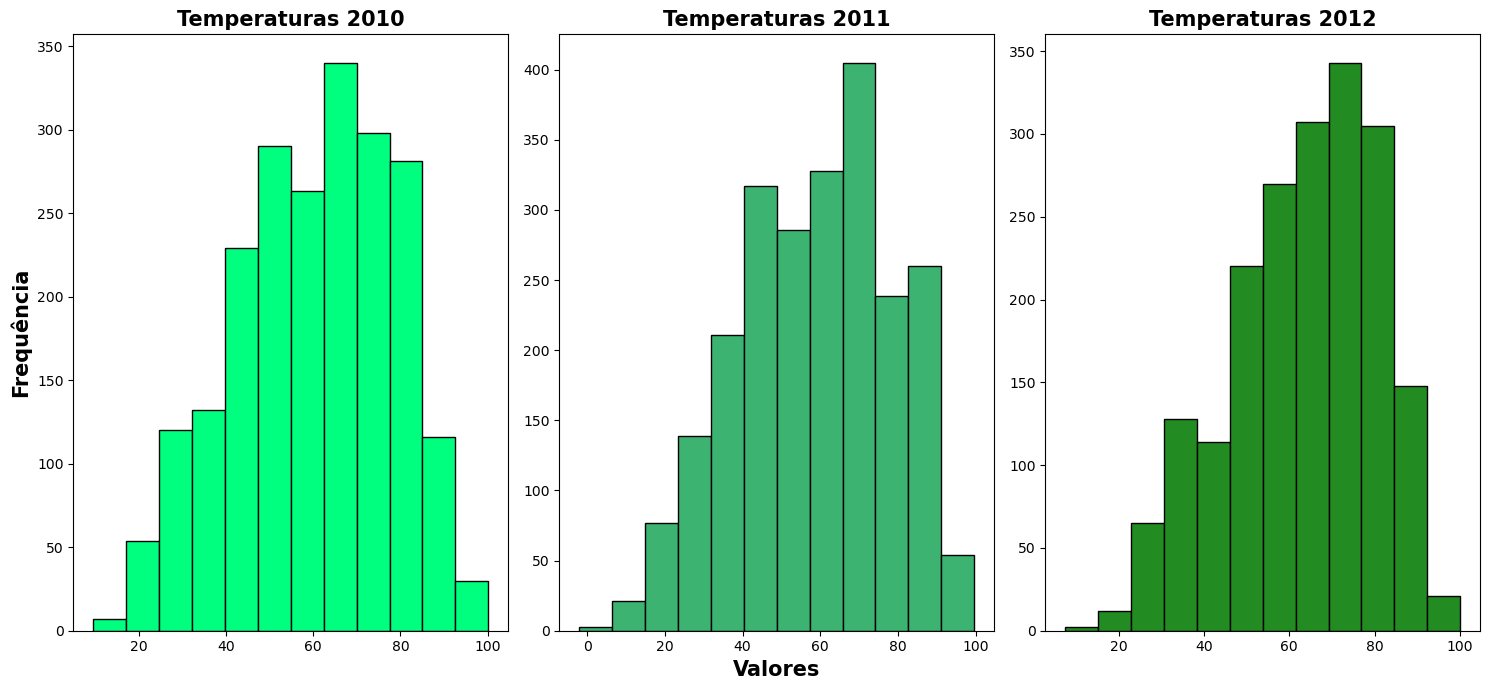

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
# Histograma 1
axs[0].hist(dados_2010['Temperature'], bins=12, color='springgreen', edgecolor='k')
axs[0].set_ylabel('Frequência', fontdict={'weight': 'bold'},size=15)
axs[0].set_title('Temperaturas 2010', fontdict={'weight': 'bold'},size=15)

# Histograma 2
axs[1].hist(dados_2011['Temperature'], bins=12, color='mediumseagreen', edgecolor='k')
axs[1].set_title('Temperaturas 2011', fontdict={'weight': 'bold'},size=15)
axs[1].set_xlabel('Valores', fontdict={'weight': 'bold'},size=15)

# Histograma 3
axs[2].hist(dados_2012['Temperature'], bins=12, color='forestgreen', edgecolor='k')
axs[2].set_title('Temperaturas 2012', fontdict={'weight': 'bold'},size=15)

plt.tight_layout()
plt.show()

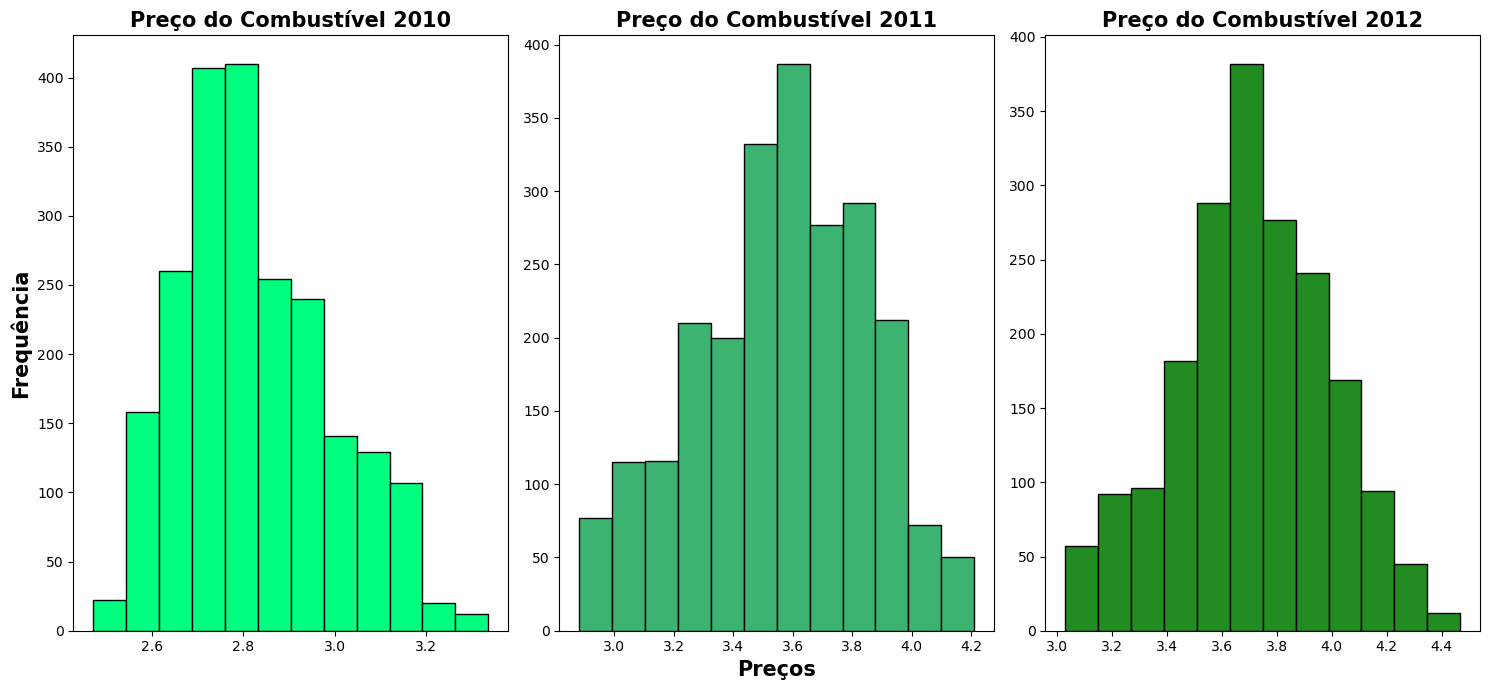

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
# Histograma 1
axs[0].hist(dados_2010['Fuel_Price'], bins=12, color='springgreen', edgecolor='k')
axs[0].set_ylabel('Frequência', fontdict={'weight': 'bold'},size=15)
axs[0].set_title('Preço do Combustível 2010', fontdict={'weight': 'bold'},size=15)

# Histograma 2
axs[1].hist(dados_2011['Fuel_Price'], bins=12, color='mediumseagreen', edgecolor='k')
axs[1].set_title('Preço do Combustível 2011', fontdict={'weight': 'bold'},size=15)
axs[1].set_xlabel('Preços', fontdict={'weight': 'bold'},size=15)

# Histograma 3
axs[2].hist(dados_2012['Fuel_Price'], bins=12, color='forestgreen', edgecolor='k')
axs[2].set_title('Preço do Combustível 2012', fontdict={'weight': 'bold'},size=15)

plt.tight_layout()
plt.show()

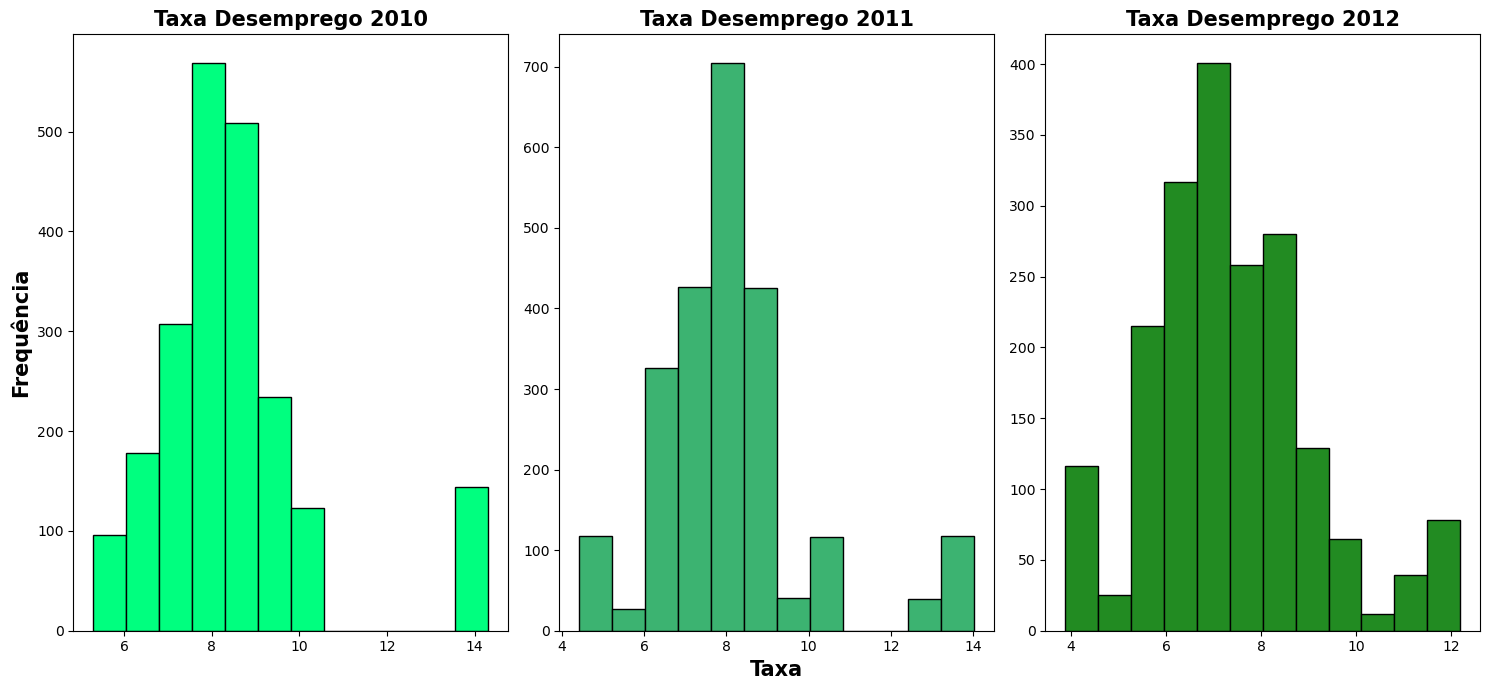

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
# Histograma 1
axs[0].hist(dados_2010['Unemployment'], bins=12, color='springgreen', edgecolor='k')
axs[0].set_ylabel('Frequência', fontdict={'weight': 'bold'},size=15)
axs[0].set_title('Taxa Desemprego 2010', fontdict={'weight': 'bold'},size=15)

# Histograma 2
axs[1].hist(dados_2011['Unemployment'], bins=12, color='mediumseagreen', edgecolor='k')
axs[1].set_title('Taxa Desemprego 2011', fontdict={'weight': 'bold'},size=15)
axs[1].set_xlabel('Taxa', fontdict={'weight': 'bold'},size=15)

# Histograma 3
axs[2].hist(dados_2012['Unemployment'], bins=12, color='forestgreen', edgecolor='k')
axs[2].set_title('Taxa Desemprego 2012', fontdict={'weight': 'bold'},size=15)

plt.tight_layout()
plt.show()


### Dados por semestre

In [34]:
months_abbr = [
    "jan",  # January
    "feb",  # February
    "mar",  # March
    "apr",  # April
    "may",  # May
    "jun",  # June
    "jul",  # July
    "aug",  # August
    "sep",  # September
    "oct",  # October
    "nov",  # November
    "dec"   # December
]
months_dict = {i: month for i, month in enumerate(months_abbr)}

In [35]:
def dados_mes_ano(x):
    dados = x.groupby(x['Date'].dt.month).agg(
    vendas = pd.NamedAgg('Weekly_Sales', 'sum'),
    temperatura = pd.NamedAgg('Temperature', 'median'),
    preço_combustivel = pd.NamedAgg('Fuel_Price', 'mean'),
    cpi = pd.NamedAgg('CPI', 'median'),
    taxa_desemprego = pd.NamedAgg('Unemployment', 'median'))
    
    dados = dados.reset_index('Date')
    dados = dados.rename(columns={'Date': 'Month'})
    dados = dados.rename(index= months_dict)
    
    return dados

In [36]:
dados_2010_meses = dados_mes_ano(dados_2010)
dados_2011_meses = dados_mes_ano(dados_2011)
dados_2012_meses = dados_mes_ano(dados_2012)

In [37]:
dados_2010_meses

,Month,vendas,temperatura,preço_combustivel,cpi,taxa_desemprego
jan,1,42239875.87,70.13,2.73,182.72,8.16
feb,2,191586880.67,48.01,2.74,181.95,8.32
mar,3,186226221.18,52.05,2.82,182.02,8.32
apr,4,183811789.47,64.55,2.87,181.67,8.20
may,5,280611883.51,53.95,2.84,181.85,8.30
jun,6,142436081.64,79.32,2.78,182.38,8.20
jul,7,184266355.63,76.45,2.81,181.95,8.11
aug,8,184538086.00,74.59,2.78,182.61,8.10
sep,9,179704060.73,68.49,2.78,182.01,8.11
oct,10,231120142.15,59.57,2.85,182.60,8.16


### Separando e analisando vendas por semestres

In [38]:
def semestres(x):
    primeiro_sem = x[x['Month'].between(1,6)]
    segundo_sem = x[x['Month'].between(7,12)]
    return primeiro_sem, segundo_sem

In [39]:
primeiro_sem_2010, segundo_sem_2010 = semestres(dados_2010_meses)
primeiro_sem_2011, segundo_sem_2011 = semestres(dados_2011_meses)
primeiro_sem_2012, segundo_sem_2012 = semestres(dados_2012_meses)

In [40]:
def eixo_x_meses(x):
    x = x['Month']
    return x


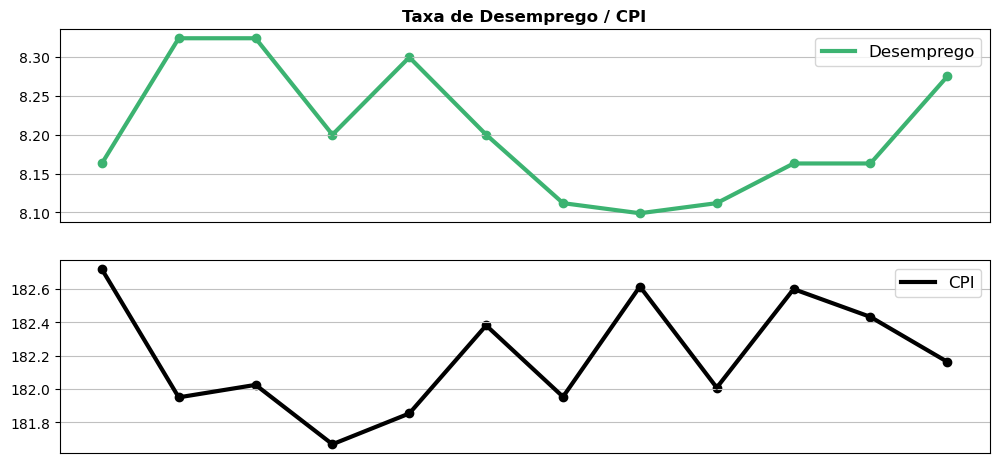

In [41]:
x = eixo_x_meses(dados_2010_meses)
x1 = eixo_x_meses(dados_2011_meses)
x2 = eixo_x_meses(dados_2012_meses)
xz = x + x1 + x2
y = dados_2010_meses['taxa_desemprego']
y2 = dados_2010_meses['cpi']

fig, axs = plt.subplots(2, 1, figsize=(12, 5.5))

axs[0].plot(xz, y, label = 'Desemprego', color = 'mediumseagreen', linewidth = 3)
axs[0].scatter(xz, y, color = 'mediumseagreen')
axs[0].set_title('Taxa de Desemprego / CPI', fontdict={'weight': 'bold'}, size=12)
axs[0].set_xticks([])
axs[0].grid(color = 'silver')
axs[0].legend(fontsize='large')



axs[1].plot(xz, y2, label = 'CPI', color = 'k', linewidth = 3)
axs[1].scatter(xz, y2, color= 'k')
axs[1].set_xticks([])
axs[1].grid(color = 'silver')
axs[1].legend(fontsize='large')


plt.show()

In [42]:
x = eixo_x_meses(primeiro_sem_2010)
largura = 0.3

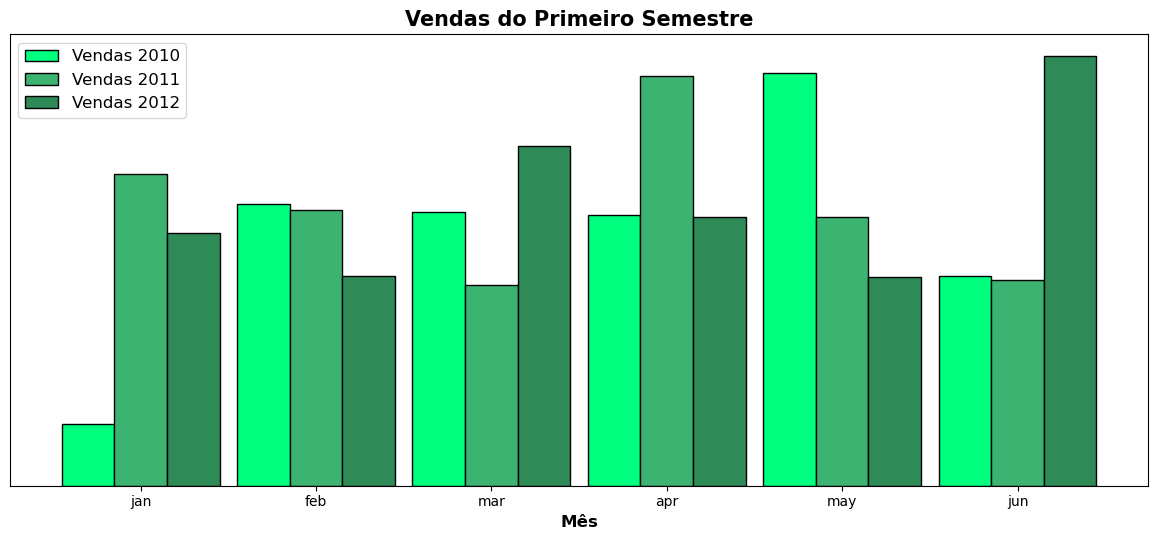

In [43]:
plt.figure(figsize=(12, 5.5))

plt.bar(x - largura, primeiro_sem_2010['vendas'], width= largura, label='Vendas 2010', color ='springgreen', edgecolor='k')
plt.bar(x, primeiro_sem_2011['vendas'], width= largura, label='Vendas 2011', color='mediumseagreen', edgecolor='k')
plt.bar(x + largura, primeiro_sem_2012['vendas'], width= largura, label='Vendas 2012', color='seagreen', edgecolor='k')

plt.title('Vendas do Primeiro Semestre', fontdict={'weight': 'bold'}, size= 15)
plt.xlabel('Mês', fontdict={'weight': 'bold'},size=12)

plt.tight_layout()
plt.xticks(x, primeiro_sem_2010.index)
plt.yticks([])
plt.legend(fontsize='large')
plt.show()

In [44]:
x = eixo_x_meses(segundo_sem_2010)

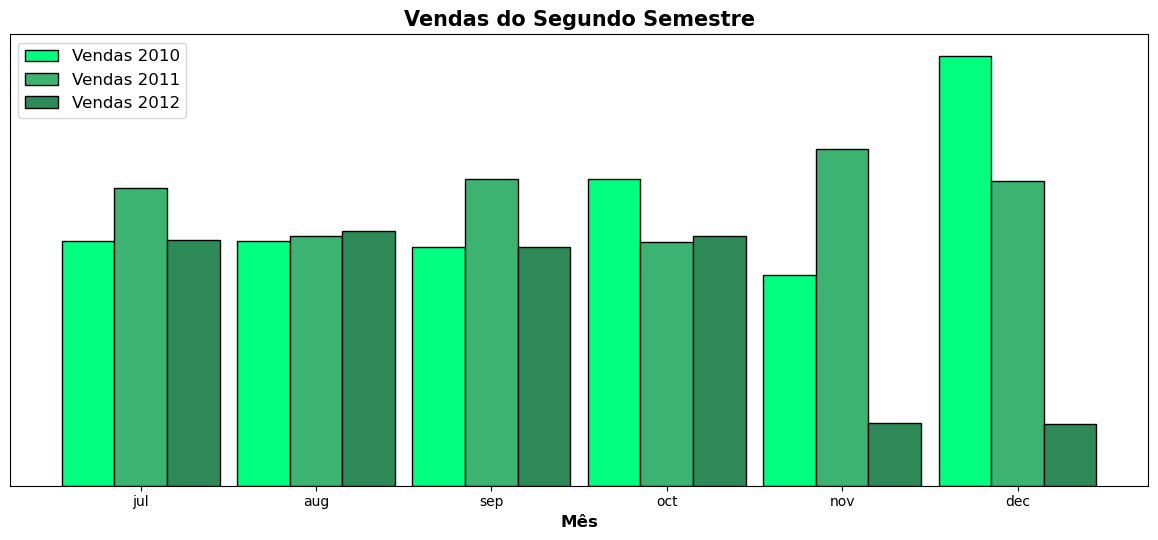

In [45]:
plt.figure(figsize=(12, 5.5))

plt.bar(x - largura, segundo_sem_2010['vendas'], width= largura, label='Vendas 2010', color ='springgreen', edgecolor='k')
plt.bar(x, segundo_sem_2011['vendas'], width= largura, label='Vendas 2011', color='mediumseagreen', edgecolor='k')
plt.bar(x + largura, segundo_sem_2012['vendas'], width= largura, label='Vendas 2012', color='seagreen', edgecolor='k')

plt.title('Vendas do Segundo Semestre', fontdict={'weight': 'bold'}, size= 15)
plt.xlabel('Mês', fontdict={'weight': 'bold'},size=12)

plt.tight_layout()
plt.xticks(x, segundo_sem_2010.index)
plt.yticks([])
plt.legend(fontsize='large')
plt.show()

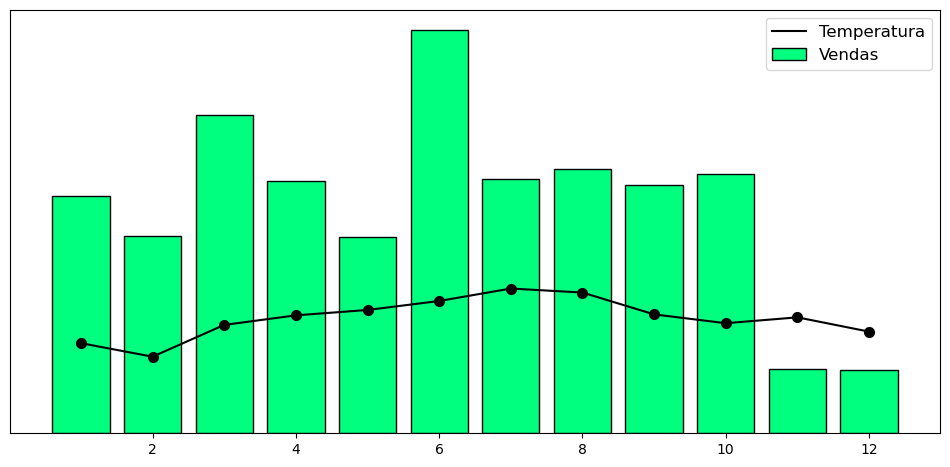

In [55]:
x = dados_2010_meses['Month']
plt.figure(figsize=(12,5.5))

plt.bar(x,dados_2012_meses['vendas'] /190, label = 'Vendas', color = 'springgreen', edgecolor='k')
plt.scatter(x, dados_2012_meses['temperatura'] *  7000,  marker = "o", color='k', linewidth = 2)
plt.plot(x, dados_2012_meses['temperatura'] *  7000, label='Temperatura', linestyle='-', color='k')    

### titúlo
plt.title("")
plt.legend(fontsize='large')
plt.yticks([])
plt.xticks()
plt.show()

### Trabalhando com as lojas

In [47]:
dados_2010.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [48]:
pd.to_numeric(dados_2010['Store']) 

0        1
1        1
2        1
3        1
4        1
        ..
6335    45
6336    45
6337    45
6338    45
6339    45
Name: Store, Length: 2160, dtype: int64

In [49]:
def agrupa_por_loja(x):
    lojas = x.groupby('Store').agg(vendas_totais = pd.NamedAgg('Weekly_Sales', 'sum'),
                                    preco_combustivel = pd.NamedAgg('Fuel_Price', 'median'),
                                    cpi = pd.NamedAgg('CPI', 'median'),
                                    taxa_desemprego = pd.NamedAgg('Unemployment', 'median')
                                  )
    lojas = lojas.reset_index()
    
    return lojas
    

In [50]:
lojas_2010 = agrupa_por_loja(dados_2010)
lojas_2011 = agrupa_por_loja(dados_2011)
lojas_2012 = agrupa_por_loja(dados_2012)

In [51]:
top_3_lojas_2010_vendas = lojas_2010.sort_values('vendas_totais', ascending=False).head(3)
top_3_lojas_2011_vendas = lojas_2011.sort_values('vendas_totais', ascending=False).head(3)
top_3_lojas_2012_vendas = lojas_2012.sort_values('vendas_totais', ascending=False).head(3)

In [52]:
top_3_lojas_2012_vendas

,Store,vendas_totais,preco_combustivel,cpi,taxa_desemprego
33,4,92771189.24,3.55,130.84,4.31
12,20,89827709.38,3.82,214.55,7.14
4,13,86707455.02,3.68,130.84,5.96


In [53]:
top_3_lojas_2010_cpi = lojas_2010.sort_values('cpi', ascending=False).head(3)
top_3_lojas_2011_cpi = lojas_2011.sort_values('cpi', ascending=False).head(3)
top_3_lojas_2012_cpi = lojas_2012.sort_values('cpi', ascending=False).head(3)


In [54]:
top_3_lojas_2012_combustivel = lojas_2010.sort_values('cpi', ascending=False).head(3)
top_3_lojas_2012_combustivel = lojas_2011.sort_values('cpi', ascending=False).head(3)
top_3_lojas_2012_combustivel = lojas_2012.sort_values('cpi', ascending=False).head(3)
